## Simulated Annealing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [32]:
def peaks(x,y):
    return 3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

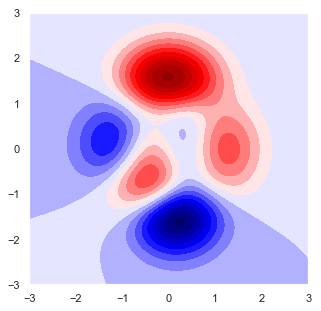

In [299]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

X,Y = np.meshgrid(x,y)

Z = peaks(X,Y)
plt.figure(figsize=(5,5))
plt.contourf(X,Y,Z,20,cmap=plt.cm.seismic)
plt.show()

Next we use SA to seach the global minimal of the peak function (which has multiple local minimals and maximals). Try different hyperparameters.

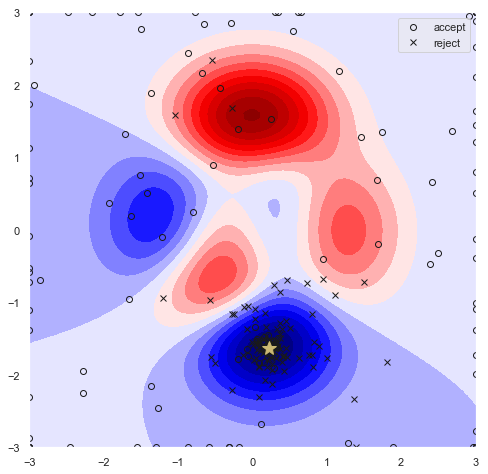

In [327]:
Z = peaks(X,Y)
plt.figure(figsize=(8,8))
plt.contourf(X,Y,Z,20,cmap=plt.cm.seismic)


x_init = -2
y_init = 2

x_bound = [-3,3]
y_bound = [-3,3]


max_iter = 100
learning_rate = 0.5

T0 = 200
Tf = 1e-6

T = T0
x_old = x_init
y_old = y_init

while T >= Tf:
    
    #print('Temperature = {}'.format(T))
    
    for i in range(max_iter):
        E_old = peaks(x_old,y_old)

        std = np.minimum(np.sqrt(T),10/(3*learning_rate))
        x_new = x_old + learning_rate*np.random.normal(0,std)
        y_new = y_old + learning_rate*np.random.normal(0,std)
        
        x_new = max(min(x_new,x_bound[1]),x_bound[0])
        y_new = max(min(y_new,y_bound[1]),y_bound[0])
        
        E_new = peaks(x_new,y_new)

        delta = E_new - E_old
        accept = False
        
        if delta <= 0:
            x_old = x_new
            y_old = y_new
            
            accept = True
            
        else:
            criterion = np.exp(-delta/T)
            if np.random.uniform() < criterion:
                x_old = x_new
                y_old = y_new
                
                accept = True
                
        
        if i%20 == 0:
            if accept:
                ax1 = plt.plot(x_new,y_new,'ko',markerfacecolor='None')
            else:
                ax2 = plt.plot(x_new,y_new,'kx')
                
    T = 0.8*T

#print('x = {}, y = {}, z={}'.format(x_old,y_old,peaks(x_old,y_old)))
plt.plot(x_old,y_old,'y*',ms=15)
plt.legend((ax1[0],ax2[0]),('accept','reject'))
plt.show()

### Take away

Different from MCMC (a sampling method), SA is a optimazition method which directly return the parameters value. It tends to obtain the global minimal. How it works is SA allows to accept worse solutions given a certain acceptance probablity at each temperature step so that it search the whole region "randomly". Compared to gradient descent, it avoid to reach the local minimal. However, we can use multiple random initialization for GD (which is actually MC) to reach the global minimal.